https://www.kaggle.com/ash316/eda-to-prediction-dietanic

# 예측에 대한 EDA (DieTanic)

### 때로는 인생에는 잔인한 유머 감각이있어 최악의 시간에 항상 원했던 것을 줄 수 있습니다.

-Lisa Kleypas

타이타닉 침몰은 역사상 가장 악명 높은 난파선 중 하나입니다. 1912 년 4 월 15 일, 처녀 여행 중에 타이타닉은 빙산과 충돌하여 침몰하여 2224 명의 승객과 승무원 중 1502 명이 사망했습니다. 그래서 DieTanic이라는 이름입니다. 이것은 세상 어느 누구도 잊을 수없는 잊을 수없는 재앙입니다.

타이타닉을 건설하는 데 약 750 만 달러가 걸렸으며 충돌로 인해 바다에서 침몰했습니다. 타이타닉 데이터 셋은 초보자가 데이터 과학 여행을 시작하고 카글 경쟁에 참여할 수있는 매우 훌륭한 데이터 셋입니다.

이 노트북의 목표는 예측 모델링 문제에서 워크 플로가 어떻게 진행되는지에 대한 **아이디어를 제공하는 것입니다.** 기능을 확인하는 방법, 새로운 기능 및 기계 학습 개념을 추가하는 방법 초보자도 노트북의 모든 단계를 이해할 수 있도록 노트북을 최대한 기본으로 유지하려고 노력했습니다.

당신이 노트북을 좋아하고 그것이 당신을 도왔다 고 생각한다면 .. 기뻐하십시오. 그것은 나에게 동기를 부여합니다.

## 노트북의 내용 :

#### Part1 : 탐색 적 데이터 분석 (EDA) :

1) 특징의 분석.

2) 여러 기능을 고려한 관계 또는 동향 파악

#### Part2 : Feature Engineering and Data Cleaning:


1) 몇 가지 기능 추가.

2) 중복 기능 제거.

3) 모델링에 적합한 형태로 기능을 변환합니다.

#### Part3 : 예측 모델링

1) 기본 알고리즘 실행.

2) 교차 검증.

3) 조립.

4) 중요한 특징 추출.

### Part1 : 탐색 적 데이터 분석 (EDA)

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data=pd.read_csv('C:/Users/user/Nano_python/data/Titanic/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin 및 Embarked에는 null 값이 있습니다. 나는 그들을 고치려고 노력할 것이다.

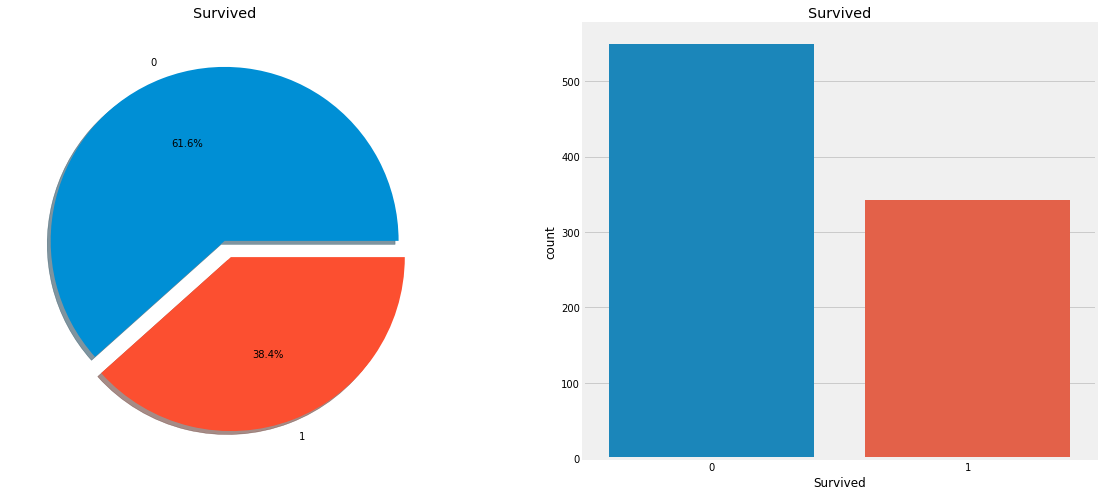

In [5]:
fig, ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

사고로 살아남은 승객은 많지 않은 것이 분명합니다.

훈련 세트에 탑승 한 891 명의 승객 중 약 350 명만이 생존했습니다. 즉 전체 훈련 세트 중**38.4 %**만이 충돌에서 살아 남았습니다. 우리는 데이터에서 더 나은 통찰력을 얻고 더 많은 승객이 생존하지 못한 승객을 파악하기 위해 더 많은 정보를 조사해야합니다.

데이터 세트의 다른 기능을 사용하여 생존율을 확인하려고합니다. 특징 중 일부는 성별, 항만, 나이 등입니다.

먼저 다양한 유형의 기능을 이해하겠습니다.

## 기능의 종류

### 범주 기능 :

범주 형 변수는 둘 이상의 범주가있는 변수이며 해당 기능의 각 값을 범주별로 분류 할 수 있습니다. 예를 들어 성별은 두 가지 범주 (남성과 여성)를 갖는 범주 형 변수입니다. 이제 이러한 변수를 정렬하거나 정렬 할 수 없습니다. 또한 **명목 변수라고도합니다.**

#### 데이터 세트의 범주 적 특징 : 성별, 당황.

### 서수 특징 :

서수 변수는 범주 형 값과 비슷하지만 그 차이점은 값 사이의 상대 순서 또는 정렬이 가능하다는 것입니다. 예를 들어, 
**Tall, Medium, Short** 값을 가진 **Height**와 같은 기능이 있으면 Height는 순서 변수입니다. 여기서 변수에 상대적인 정렬을 할 수 있습니다.

### 데이터 세트의 서수 특징 : PClass

### 지속적인 특징 :

지형지 물 열의 두 지점 사이 또는 최소값 또는 최대 값 사이의 값을 사용할 수있는 경우 지형지 물은 연속적이라고합니다.

#### 데이터 세트의 지속적인 특징 : 나이

## 데이터 세트의 지속적인 특징 : 나이

### 성별 ㅡ> 범주 기능

In [6]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

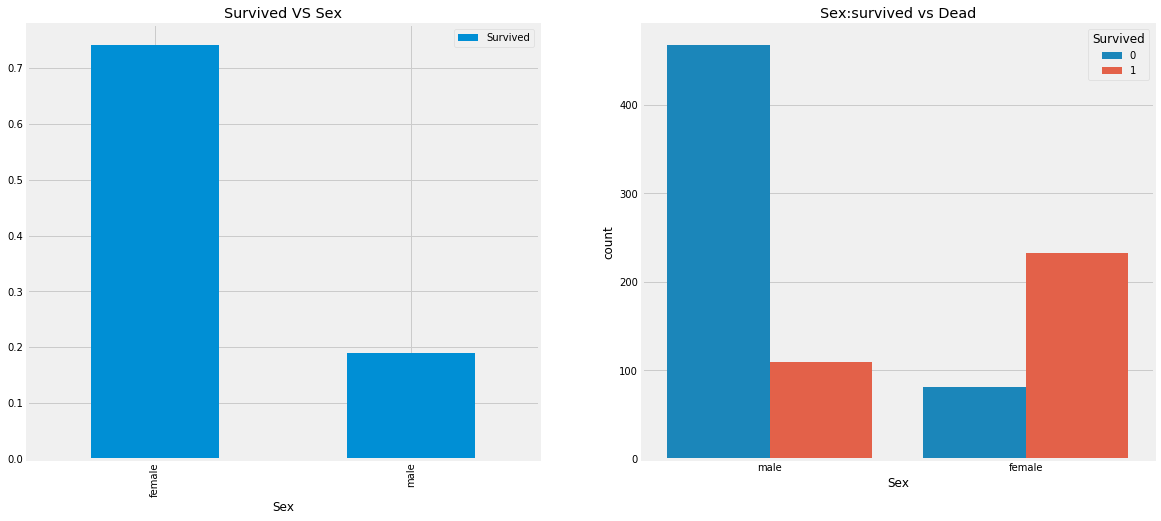

In [7]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived VS Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:survived vs Dead')
plt.show()

이것은 흥미로워 보인다. 배에있는 남자의 수는 여자의 수보다 훨씬 많다. 여전히 여성 수는 남성 수의 거의 두 배입니다. 선박의 **여성의 생존율은 약 75 % 인 반면 남성의 생존율은 약 18-19 %입니다.**

이것은 모델링에 **매우 중요한** 기능인 것 같습니다. 하지만 최고입니까? 다른 기능을 확인할 수 있습니다.

### Pclass ㅡ> 서수 특징

In [8]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


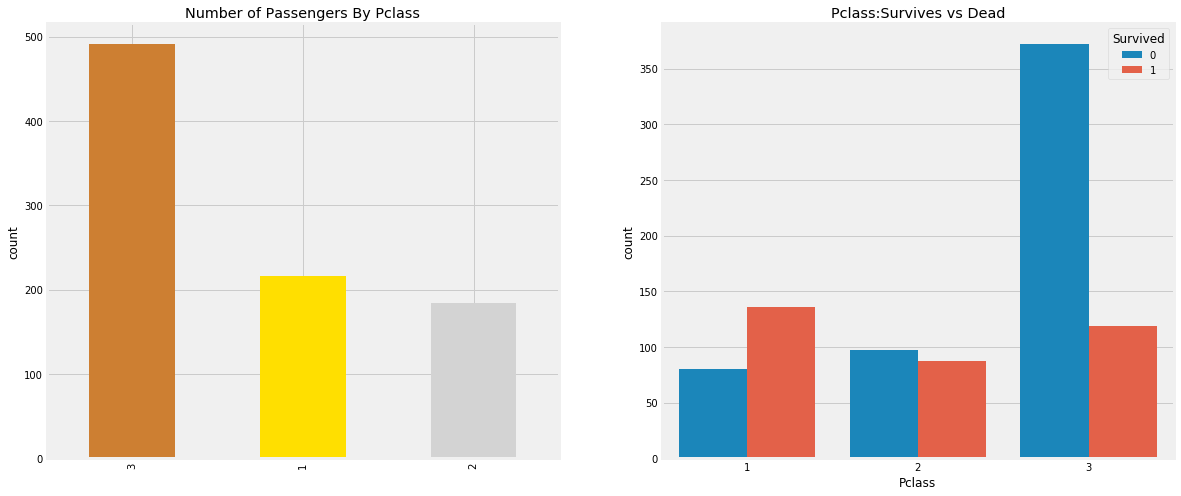

In [9]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts(). plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('count')
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:Survives vs Dead')
plt.show()                                                                                   

사람들은 **돈이 모든 것을 살 수 없다고 말합니다.** 그러나 Pclass 1의 Passenegers of Pclass 1은 구조하는 동안 매우 높은 우선 순위가 부여되었음을 분명히 알 수 있습니다. Pclass 3의 승객 수는 훨씬 많았지 만 여전히 **25 %** 정도의 생존률은 매우 낮습니다.

Pclass 1의 경우 생존율은 약 **63 %**이고 Pclass2의 경우 약 **48 %**입니다. 돈과 지위가 중요합니다. 그런 물질주의 세계.

조금 더 뛰어 들고 다른 흥미로운 관찰을 확인하십시오. Sex와 Pclass Together로 **생존율**을 확인할 수 있습니다.

In [10]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

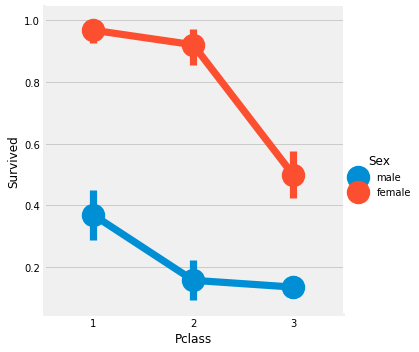

In [11]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

이 경우 **FactorPlot**을 사용합니다. 범주 형 값을 쉽게 분리 할 수 ​​있기 때문입니다.

**CrossTab**과 **FactorPlot**을 살펴보면 Pclass1에서 94 명의 **여성 중 3 명만이 사망 한 것처럼 Pclass1에서 여성의 생존율은 약 95-96%**임을 쉽게 알 수 있습니다.

Pclass와 상관없이 구출하는 동안 여성에게 최우선 순위가 부여 된 것은 분명합니다. Pclass1의 남성조차도 생존율이 매우 낮습니다.

Pclass도 중요한 기능인 것 같습니다. 다른 기능을 분석 할 수 있습니다.

## 나이 ㅡ> 지속적인 특징

In [12]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age in the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age in the ship: 29.69911764705882 Years


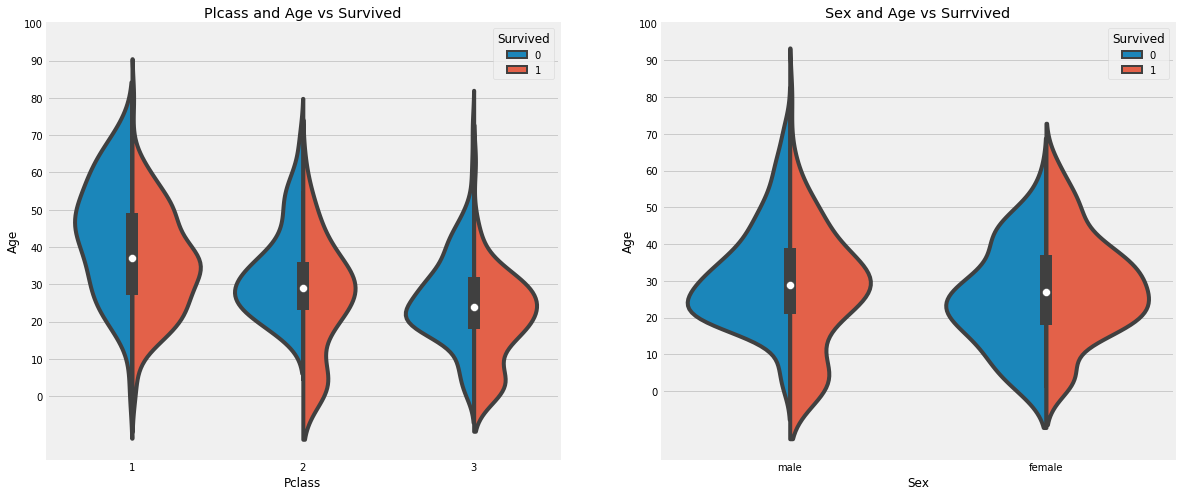

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Plcass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Surrvived')
ax[1].set_yticks(range(0,110,10))
plt.show()

### 관찰 :

1) Pclass에 따라 어린이 수가 증가하고 10 세 미만의 어린이 (즉, 어린이)의 생존율은 Pclass에 상관없이 양호 해 보입니다.

2) Pclass1에서 20-50 세의 Passenegers 생존 가능성은 높고 여성에게는 더 좋습니다.

3) 남성의 경우 생존 확률은 나이가 증가함에 따라 감소합니다.

앞에서 보았 듯이 Age 기능에는 **177** 개의 null 값이 있습니다. 이러한 NaN 값을 대체하기 위해 데이터 집합의 평균 수명을 지정할 수 있습니다.

그러나 문제는 나이가 많은 많은 사람들이 있다는 것입니다. 우리는 평균 연령이 29 세인 4 세 아이를 배정 할 수 없습니다. 승객이 어떤 연령대에 있는지 알 수있는 방법이 있습니까?

**빙고 !!!!** <br>
**이름** 기능을 확인할 수 있습니다. 이 기능을 살펴보면 이름에 Mr 또는 Mrs와 같은 인사말이 있음을 알 수 있으므로 Mr 및 Mrs의 평균 값을 각 그룹에 할당 할 수 있습니다.

## ''컬럼에 무엇이 있습니까 ?? ''---> Feature : p

In [14]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

 #lets extract the Salutations

자 이제 여기 정규식을 사용하고 있습니다 : [A-Za-z] +). 그것이하는 것은 A-Z 또는 a-z 사이에 있고. (점)이 오는 문자열을 찾는 것입니다. 따라서 이름에서 이니셜을 성공적으로 추출합니다.

In [15]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


#Checking the Initials with the Sex

Mlle이나 Mme과 같이 맞춤법이 틀린 이니셜이 Miss를 뜻하는 것이므로 Miss와 다른 값으로 대체 할 것입니다.

In [16]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace=True)

In [17]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

 #lets check the average age by Initials

## 나이별 NAN 값

In [18]:
## Assigning the NaN Values with the Ceil values of the mean ages

In [19]:
data.loc[(data.Age.isnull()) & (data.Initial == 'Mr'),'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial == 'Mrs'),'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial == 'Master'),'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial == 'Miss'),'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial == 'Other'),'Age'] = 46

In [20]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.616750
Miss      21.887097
Mr        32.798677
Mrs       35.984252
Other     45.888889
Name: Age, dtype: float64

In [21]:
#  마지막으로 null 값을 확인한다.
data.Age.isnull().any()

False

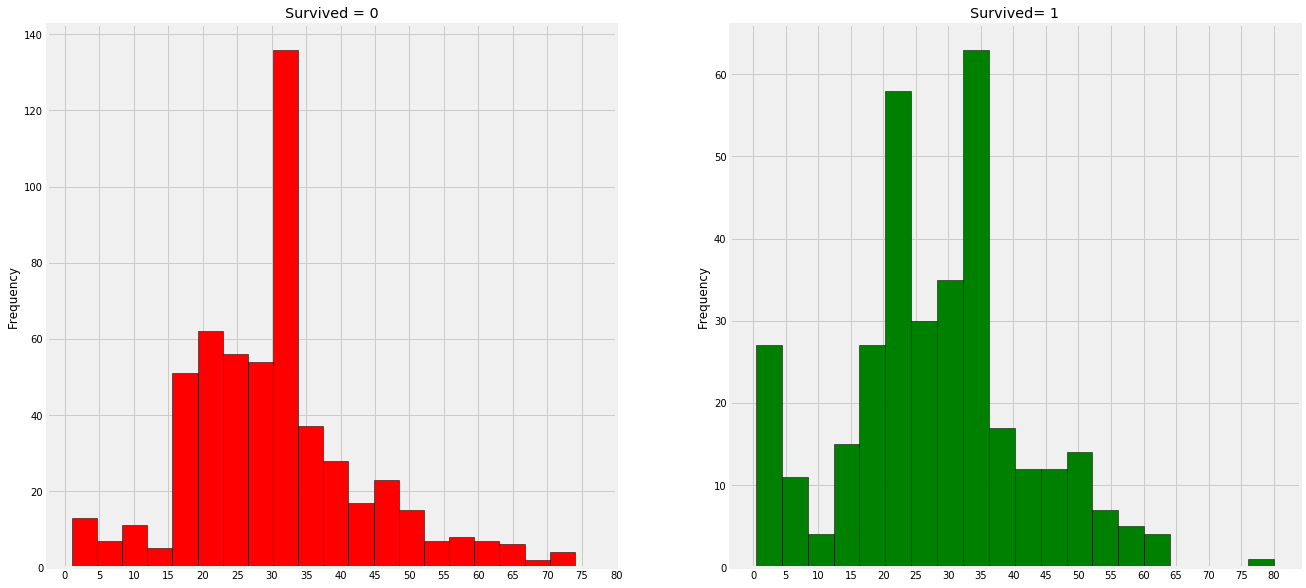

In [22]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax = ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived = 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

### 관찰 :

#### 1) 유아 (5 세 미만)는 다수 (여성과 아동 우선 정책?)로 저장되었다.

#### 2) 가장 오래된 승객 (80 년).

#### 3) 최대 사망자 수는 30-40 세의 연령 그룹에있었습니다.

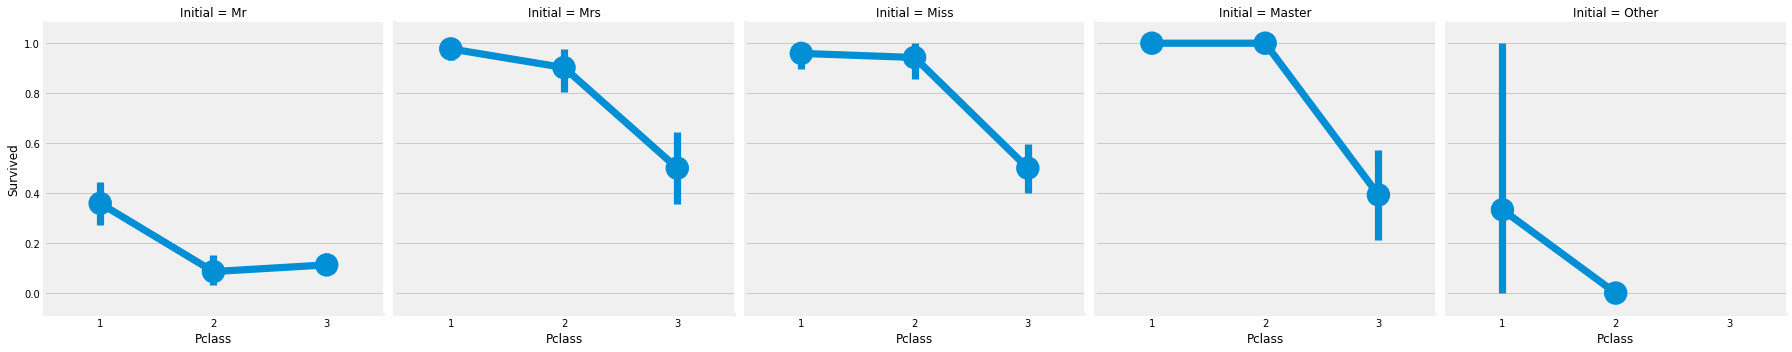

In [23]:
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

따라서 여성과 아동의 첫 번째 정책은 수업에 관계없이 사실입니다.

## 착수-> 범주 값

In [24]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

## 착수 ㅡ> 범주 값

In [25]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

## 항만에 의한 생존 가능성

Chances for Survival by Port Of Embarkation

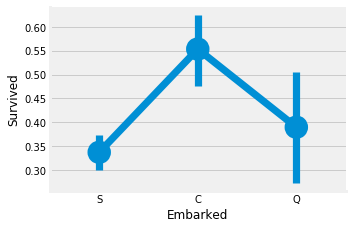

In [26]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

포트 C의 생존 가능성은 0.55 정도이며 S는 가장 낮습니다.

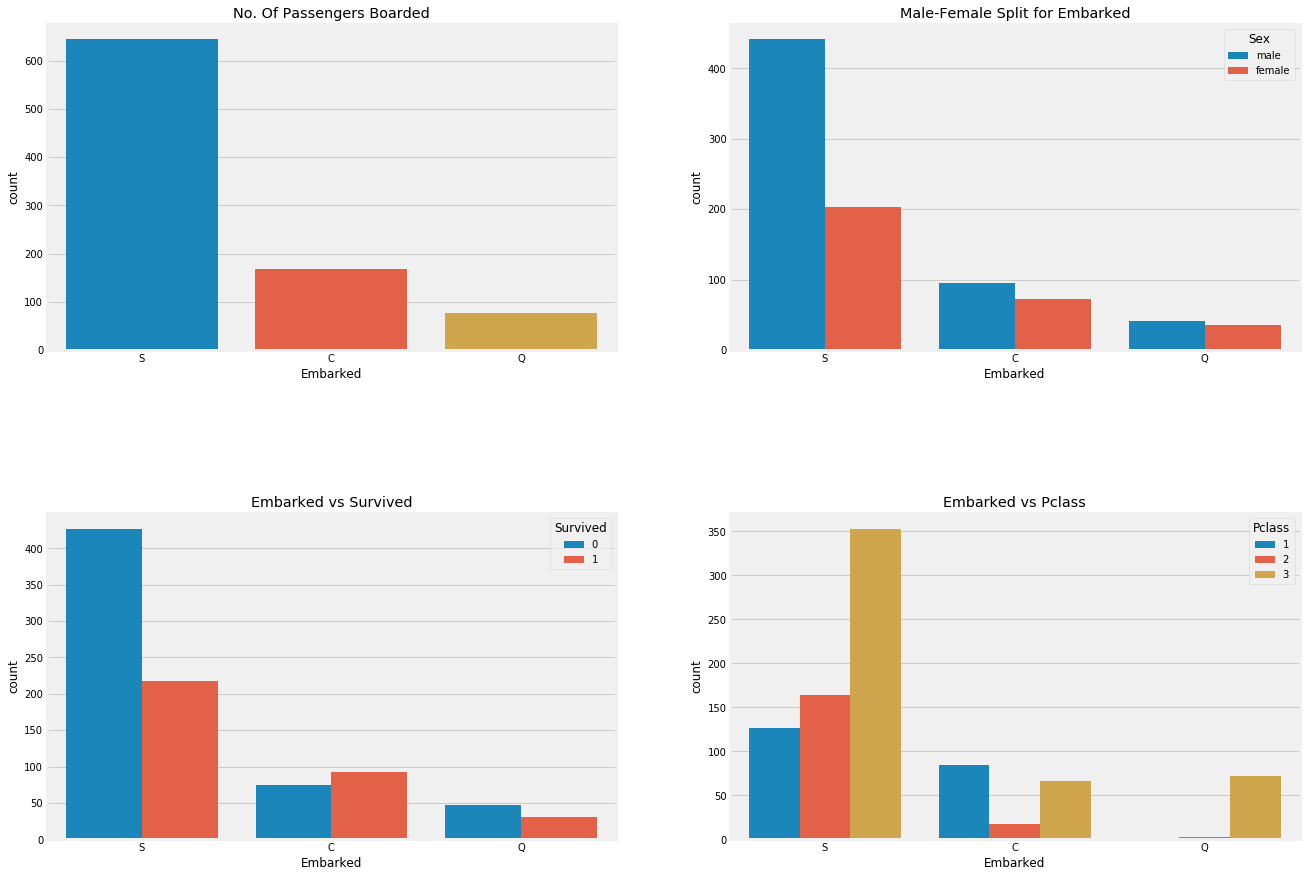

In [27]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

## 관찰 :

1) S에서 탑승 한 최대 패스 네이저. 대다수는 Pclass3에서 온 것입니다.

2) C의 승객들은 많은 사람들이 살아남 았기 때문에 운이 좋았습니다. 그 이유는 모든 Pclass1 및 Pclass2 승객을 구출 한 것일 수 있습니다.

3) Embark S는 대부분의 부자들이 탑승 한 항구에서 바라본다. 여전히 생존 가능성은 낮습니다. Pclass3의 많은 승객이 약 **81** %가 생존하지 못했기 때문입니다.

4) 포트 Q는 승객의 거의 95 %가 Pclass3 출신이었습니다.

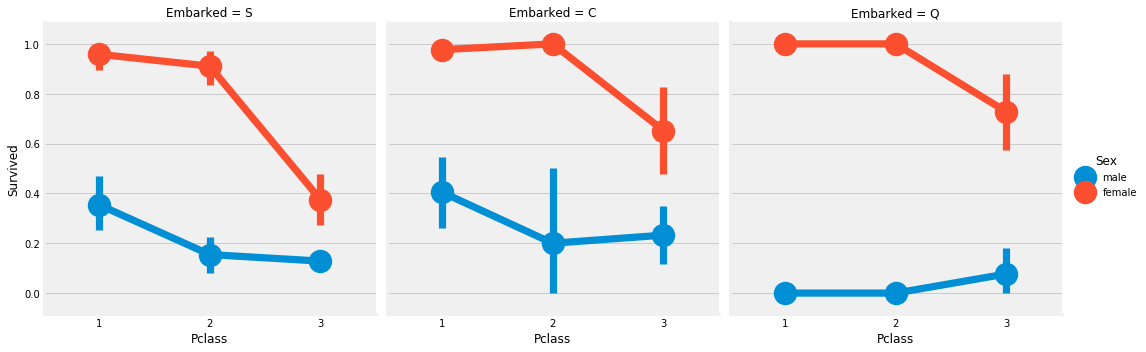

In [28]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

## 착수 NaN 작성

In [29]:
# Filling Embarked NaN

포트 S에서 탑승 한 최대 승객 수를 확인한 결과 NaN을 S로 대체했습니다.

data.Embarked.isnull


1) Pclass와 상관없이 Pclass1과 Pclass2의 여성의 생존 확률은 거의 1입니다.

2) 포트 S는 남성과 여성의 생존율이 매우 낮기 때문에 Pclass3 Passenegers에게는 매우 불행한 것으로 보입니다. **(돈 문제)**

3) 포트 Q는 거의 모두 Pclass 3에서 나온 것처럼 남성에게 무해한 것처럼 보입니다.

## 착수 NaN 작성

포트 S에서 탑승 한 최대 승객 수를 확인한 결과 NaN을 S로 대체했습니다.

In [30]:
data['Embarked'].fillna('S',inplace=True)

In [31]:
data.Embarked.isnull().any()

False

In [32]:
# Finally No NaN values

## SibSip ㅡㅡ> Discrete Feature

이 기능은 사람이 혼자인지 또는 가족과 함께 있는지를 나타냅니다.

형제 자매 = 형제, 자매, 의붓 형제, 이복 누이

배우자 = 남편, 아내

In [33]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


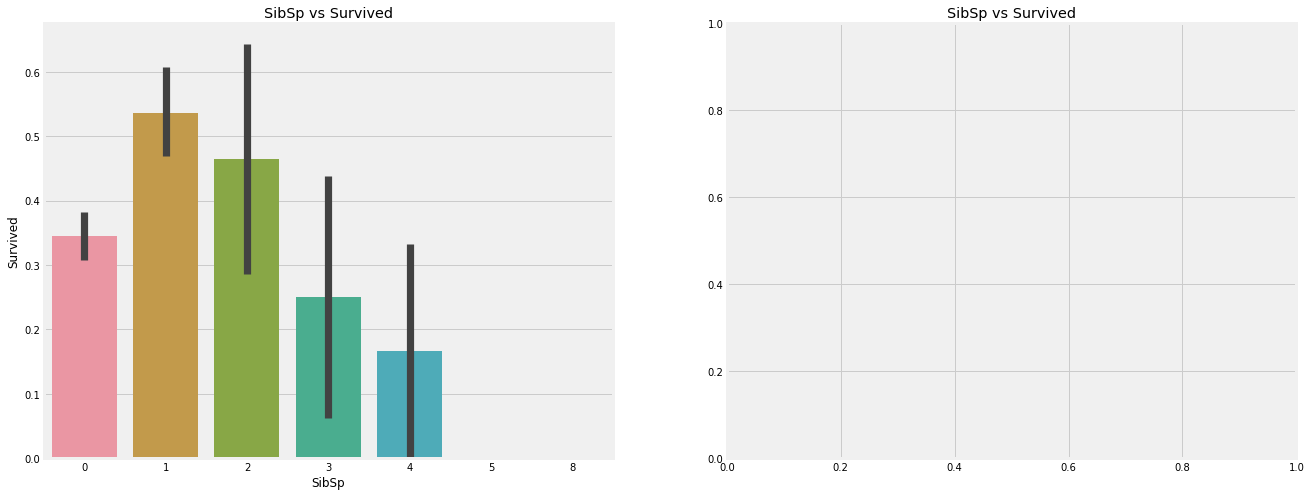

In [34]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [35]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


## 관찰 :

여기에서도 결과는 매우 비슷합니다. 부모와 함께 탑승 한 승객은 생존 가능성이 더 높습니다. 그러나 숫자가 올라 갈수록 줄어 듭니다.

생존 가능성은 배에 1-3 명의 부모가있는 누군가에게 좋습니다. 혼자 사는 것이 또한 치명적인 것으로 판명되고 누군가가 배에 4 명 이상의 부모가있을 때 생존 가능성이 줄어 듭니다.

## 운임-> 연속 기능

In [36]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


The lowest fare is **0.0.** Wow!! a free luxorious ride.

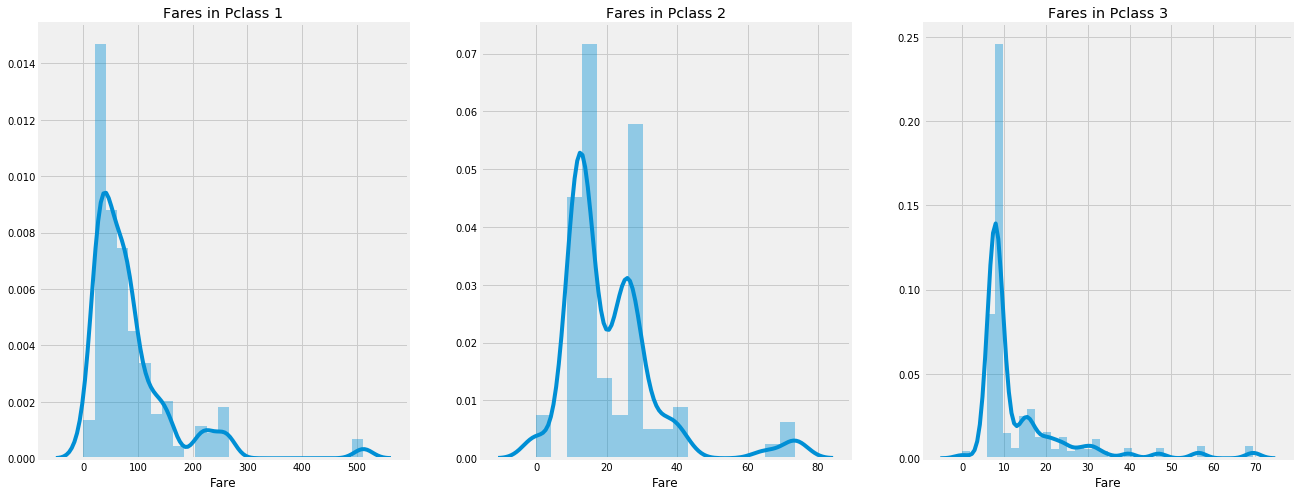

In [37]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

Pclass1의 승객 요금에는 큰 분포가있는 것으로 보이며이 분포는 표준이 감소함에 따라 계속 감소합니다. 이것은 또한 연속적이므로 비닝을 사용하여 불연속 값으로 변환 할 수 있습니다.

## 모든 기능에 대한 한마디로 관찰 :

**성별** : 여성의 생존 가능성은 남성에 비해 높습니다.

**Pclass** : 1 등석 승객이 생존 가능성을 높여주는 경향이 있습니다. Pclass3의 생존율은 매우 낮습니다. 
              <br>여성의 경우 Pclass1의 생존 가능성은 거의 1이며 Pclass2의 생존 가능성도 높습니다. 돈이 이긴다 !!!.

**나이** : 5-10 세 미만의 어린이는 생존 가능성이 높습니다. 15 ~ 35 세 그룹 승객은 많이 사망했습니다.


**착수** : 이것은 매우 흥미로운 기능입니다. C에서 생존 할 확률은 Pclass1 승객 대다수가 S에서 일어 났음에도 불구하고 더 나은 것으로 보입니다. <br>Q의 승객은 모두 Pclass3에서 왔습니다.

**Parch + SibSp** : 1-2 명의 형제 자매, 배우자 또는 1-3 명의 부모님이 혼자 있거나 대가족과 함께 여행하는 것보다 확률이 더 높습니다.


## 기능 간의 상관

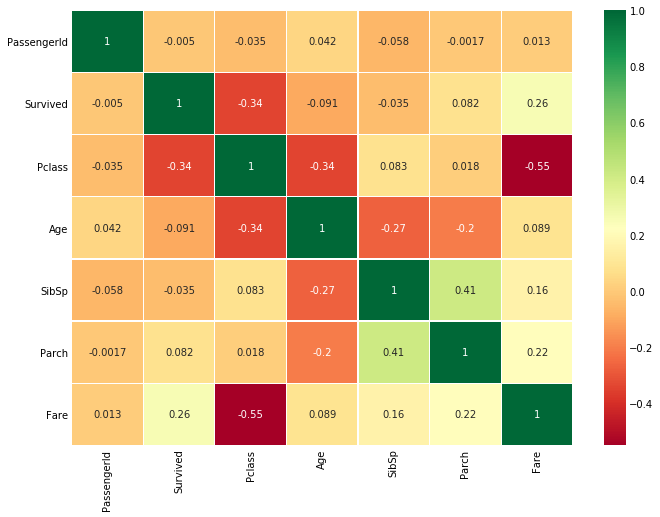

In [38]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

## 히트 맵 해석
가장 먼저 알아 두어야 할 것은 알파벳이나 문자열을 서로 연관시킬 수 없다는 것이 명백하기 때문에 숫자 기능 만 비교한다는 것입니다. 음모를 이해하기 전에 정확히 상관 관계가 무엇인지 살펴 보겠습니다.

**긍정적 상관 관계** : 기능**A가 증가하면 기능 B가 증가하면 양의 상관 관계가 있습니다.** 값 1은 완벽한 양의 상관 관계를 의미합니다.

**음의 상관 관계 **: 피처 A의 증가가 피처 B의 감소로 이어지면, 그것들은 음의 상관 관계가 있습니다. 값 -1은 완벽한 음의 상관 관계를 의미합니다.

이제 두 기능이 서로 완벽하게 상호 연관되어 있다고 말하면 한 기능이 증가하면 다른 기능도 증가합니다. 이는 두 기능 모두 매우 유사한 정보를 포함하고 있으며 정보의 차이가 거의 없거나 전혀 없음을 의미합니다. 둘 다 거의 동일한 정보를 포함하기 때문에이를 다중 선형성이라고합니다.

따라서 둘 중 하나가 중복되므로 두 가지를 모두 사용해야한다고 생각하십니까? 모델을 만들거나 훈련시키는 동안 훈련 시간과 많은 이점을 줄이면서 중복 기능을 제거해야합니다.

위의 히트 맵에서 기능이 서로 관련이 없음을 알 수 있습니다. 가장 높은 **상관 관계는 SibSp와 Parch 즉 0.41입니다.** 모든 기능을 계속 수행 할 수 있습니다.

## Part2 : 기능 엔지니어링 및 데이터 정리
이제 기능 엔지니어링이란 무엇입니까?

기능이있는 데이터 세트가 제공 될 때마다 모든 기능이 중요하지는 않습니다. 제거해야 할 중복 기능이 많이있을 수 있습니다. 또한 다른 지형지 물에서 정보를 관찰하거나 추출하여 새로운 지형지 물을 얻거나 추가 할 수 있습니다.

예를 들어 이름 기능을 사용하여 초기 기능을 얻는 것이 있습니다. 새로운 기능을 사용할 수 있는지 확인하고 몇 가지 기능을 제거하십시오. 또한 기존 관련 기능을 예측 모델링에 적합한 형식으로 변환합니다.

## Age_band

#### 연령 기능 관련 문제 :
앞서 언급 한 것처럼 Age는 연속적인 기능이므로 Machine Learning Models에서 Continous Variables에 문제가 있습니다.

**Eg** : 성별을 기준으로 스포츠 인을 그룹화하거나 정리할 경우 남성과 여성별로 쉽게 분리 할 수 ​​있습니다.

이제 나이별로 그룹화하면 어떻게 하시겠습니까? 30 명의 사람이있는 경우 30 세의 나이 값이있을 수 있습니다. 이제 문제가 있습니다.

비닝 또는 정규화를 통해 이러한 연속 값을 범주 형 값으로 변환해야합니다. 비닝을 사용합니다. 즉, 연령 범위를 단일 빈으로 그룹화하거나 단일 값을 할당합니다.

자 승객의 최대 연령은 80 세입니다. 따라서 0-80에서 5 빈으로 범위를 나눕니다. 따라서 80 / 5 = 16입니다. 16의 쓰레기통.

In [39]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [40]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')#checking the number of passenegers in each band

,Age_band
1,382
2,325
0,104
3,69
4,11


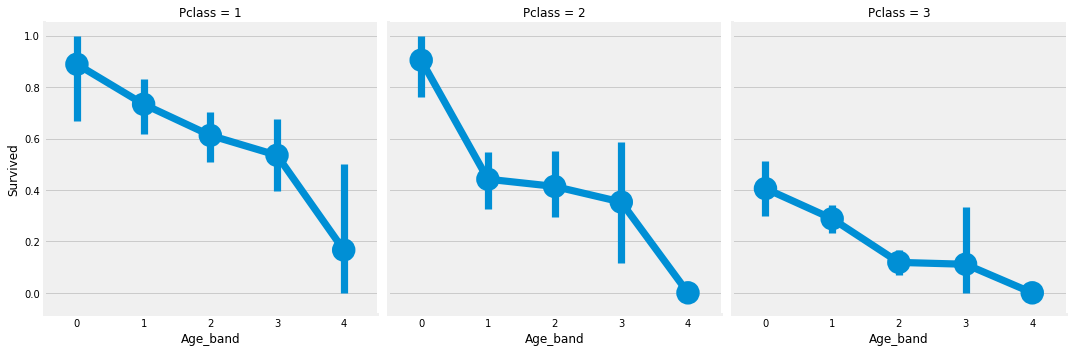

In [41]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass')
plt.show()

Pclass와 상관없이 나이가 증가함에 따라 생존율이 감소한다는 사실은 사실입니다.

## 가족 구성원 수 와  혼자

이제 "Family_size"및 "Alone"이라는 새 기능을 생성하고 분석 할 수 있습니다. 이 기능은 Parch와 SibSp의 요약입니다. 생존율이 승객의 가족 규모와 관련이 있는지 확인할 수 있도록 결합 된 데이터를 제공합니다. 혼자 승객인지 여부를 나타냅니다.

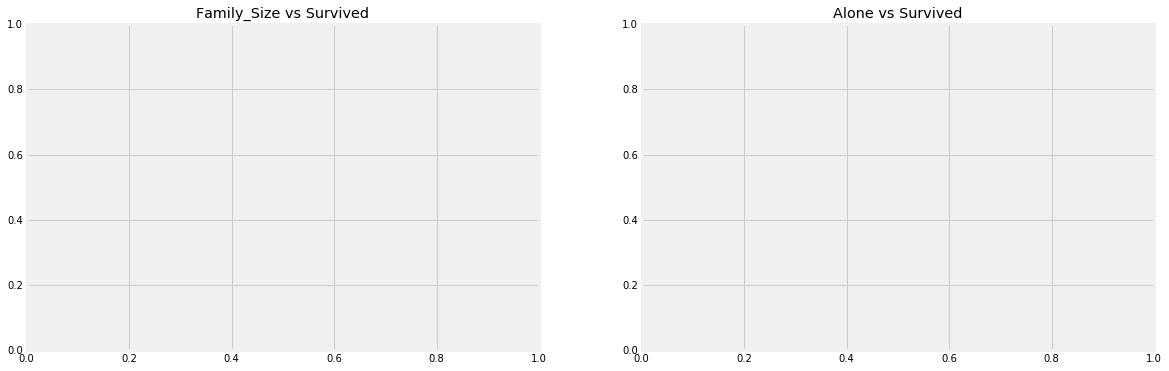

In [42]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

## Family_Size = 0은 패스 네 거가 혼자임을 의미합니다. 
분명히, 당신이 혼자이거나 family_size = 0이면, 생존 가능성은 매우 낮습니다. 가족 수> 4 인 경우 기회도 줄어 듭니다. 이것은 또한 모델에 중요한 기능으로 보입니다. 이것을 자세히 살펴 보자.

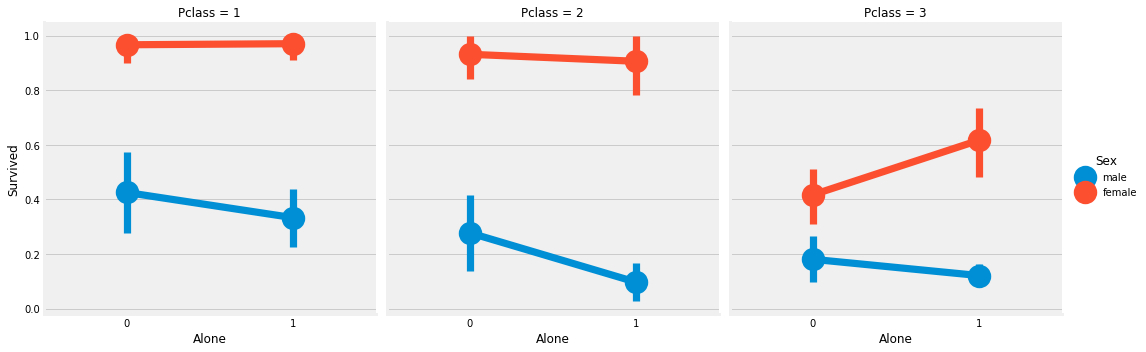

In [43]:
sns.factorplot('Alone','Survived',data=data,hue='Sex',col='Pclass')
plt.show()

혼자있는 여성의 가능성이 가족보다 높은 Pclass3을 제외하고는 성별이나 Pclass에 관계없이 혼자있는 것이 해로운 것으로 보입니다.

## 요금 _ 범위

운임 역시 지속적인 특징이므로이를 서수 값으로 변환해야합니다. 이를 위해 **pandas.qcut**을 사용합니다.

따라서 **qcut**은 우리가 통과 한 빈의 수에 따라 값을 나누거나 정렬합니다. 따라서 5 개의 구간을 전달하면 5 개의 구간 또는 값 범위에 동일한 간격으로 값이 정렬됩니다.

In [44]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


위에서 논의한 바와 같이, **fare_range가 증가함에 따라 생존 가능성이 증가한다는 것을 분명히 알 수 있습니다.**

이제 Fare_Range 값을 그대로 전달할 수 없습니다. **Age_Band**에서와 마찬가지로 싱글 톤 값으로 변환해야합니다

In [45]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

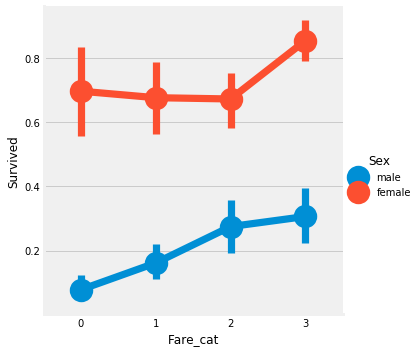

In [46]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

Fare_cat이 증가함에 따라 생존 확률이 증가합니다. 이 기능은 섹스와 함께 모델링하는 동안 중요한 기능이 될 수 있습니다.

## 문자열 값을 숫자로 변환

문자열을 기계 학습 모델로 전달할 수 없으므로 성 (Lake) 성별, 시작 (Ebarked) 등의 기능을 숫자 값으로 변환해야합니다.

In [47]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

## 불필요한 기능 삭제
**이름->** 범주 기능으로 변환 할 수 없으므로 이름 기능이 필요하지 않습니다.

**Age->** Age_band 기능이 있으므로이 기능이 필요하지 않습니다.

**티켓->** 분류 할 수없는 임의의 문자열입니다.

**운임->** Fare_cat 기능이 있으므로 필요하지 않습니다.

**캐빈->** 많은 NaN 값과 많은 승객에게 여러 캐빈이 있습니다. 따라서 이것은 쓸모없는 기능입니다.

**Fare_Range->** fare_cat 기능이 있습니다.

**PassengerId->** 분류 할 수 없습니다.

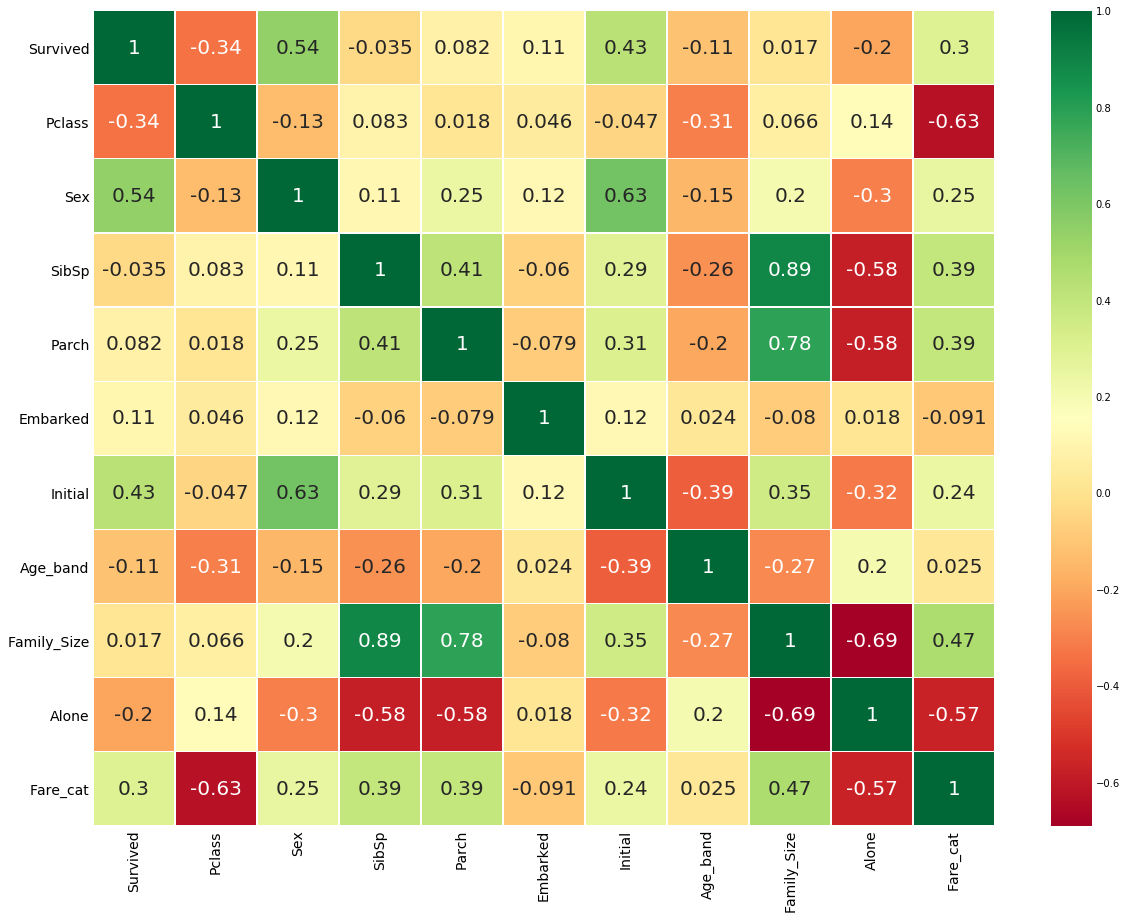

In [48]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

위의 상관 관계 플롯에서 긍정적으로 관련된 기능을 볼 수 있습니다. 그들 중 일부는 SibSp 및 가족 Family_Size 및 Parch 및 Family_Size이며 Alone 및 Family_Size와 같은 부정적인 것입니다.

## Part3 : 예측 모델링
우리는 EDA 부분에서 통찰력을 얻었습니다. 그러나이를 통해 승객의 생존 여부를 정확하게 예측하거나 알 수 없습니다. 이제 우리는 승객이 훌륭한 분류 알고리즘을 사용할지 여부를 예측할 것입니다. 다음은 모델을 만드는 데 사용할 알고리즘입니다.

1) 로지스틱 회귀

2) 벡터 기계 지원 (선형 및 방사형)

3) 임의의 숲

4) K-가장 가까운 이웃

5) 순진한 베이 즈

6) 의사 결정 트리

7) 로지스틱 회귀

In [49]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [50]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

## 방사형 지원 벡터 머신 (rbf-SVM)

In [51]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.835820895522388


## 선형 지원 벡터 머신 (선형 -SVM)

In [52]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8171641791044776


## 로지스틱 회귀

In [53]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


## 의사 결정 트리

In [54]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8097014925373134


## K- 가까운 이웃 (KNN)

In [55]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.832089552238806


이제 n_neighbours 속성의 값을 변경하면 KNN 모델의 정확도가 변경됩니다. **기본값은 5**입니다. **n_neighbours**의 다양한 값에 대한 정확도를 확인할 수 있습니다.

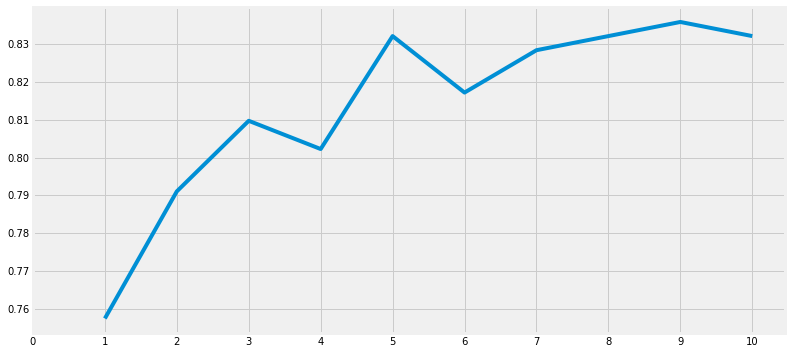

Accuracies for different values of n are: [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] with the max value as  0.835820895522388


In [56]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

## 가우스 나이브 베이 즈
Gaussian Naive Bayes

In [57]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


## 임의의 숲

In [58]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8134328358208955


모델의 정확성이 분류기의 견고성을 결정하는 유일한 요인은 아닙니다. 분류 기가 훈련 데이터를 통해 훈련되고 테스트 데이터를 통해 테스트되고 90 %의 정확도를 얻습니다.

이제 이것은 분류기에 매우 좋은 정확도 인 것 같습니다. 그러나 모든 새로운 테스트 세트에 대해 90 %가 될 것임을 확인할 수 있습니까 ??. 답은 아니오입니다. 분류자가 어떤 훈련을 할 것인지를 결정할 수 없기 때문입니다. 교육 및 테스트 데이터가 변경되면 정확도도 변경됩니다. 증가 또는 감소 할 수 있습니다. 이것을 모델 분산이라고합니다.

이를 극복하고 일반화 된 모델을 얻기 위해 교차 검증을 사용합니다.

## 교차 검증
여러 번 데이터가 불균형합니다. 즉, class1 인스턴스는 많지만 다른 클래스 인스턴스는 적을 수 있습니다. 따라서 데이터 세트의 모든 인스턴스에서 알고리즘을 학습하고 테스트해야합니다. 그런 다음 데이터 세트에 대해 언급 된 모든 정확도의 평균을 취할 수 있습니다.

1) K-Fold Cross Validation은 먼저 데이터 집합을 k-subset으로 나누어 작동합니다.

2) 데이터 세트를 (k = 5) 부분으로 나눕니다. 테스트를 위해 1 개의 부품을 예약하고 4 개의 부품에 대해 알고리즘을 훈련시킵니다.

3) 우리는 각 반복에서 테스트 부분을 변경하고 다른 부분에 대해 알고리즘을 훈련함으로써 프로세스를 계속합니다. 그런 다음 정확도와 오류를 평균하여 알고리즘의 평균 정확도를 얻습니다.

이것을 K-Fold Cross Validation이라고합니다.

4) 알고리즘은 일부 학습 데이터의 데이터 세트에 적합하지 않을 수 있으며 때로는 다른 학습 세트의 데이터에 적합 할 수도 있습니다. 따라서 교차 검증을 통해 일반화 된 모델을 얻을 수 있습니다.

In [59]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.024061
KNN,0.813783,0.041210
Decision Tree,0.812584,0.027434
Naive Bayes,0.801386,0.028999
Random Forest,0.812609,0.038050


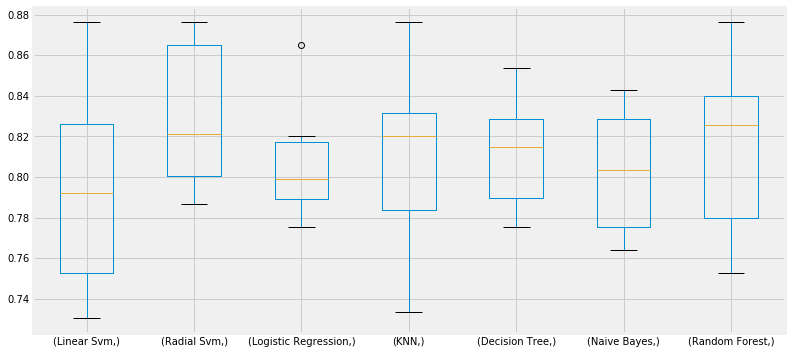

In [60]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

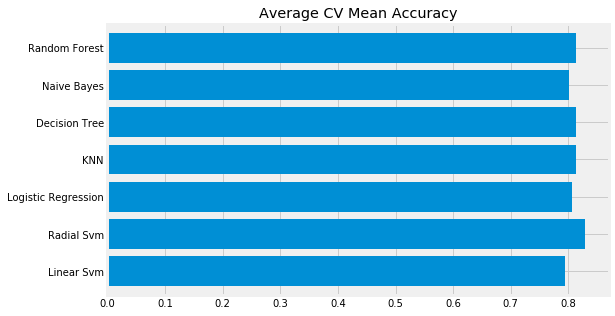

In [61]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

불균형으로 인해 분류 정확도가 잘못 될 수 있습니다. 모델이 어디에서 잘못되었는지 또는 모델이 잘못 예측 한 클래스를 보여주는 혼란 매트릭스를 사용하여 요약 된 결과를 얻을 수 있습니다.

## 혼란 매트릭스
분류기에 의해 작성된 정확하고 잘못된 분류의 수를 제공합니다.

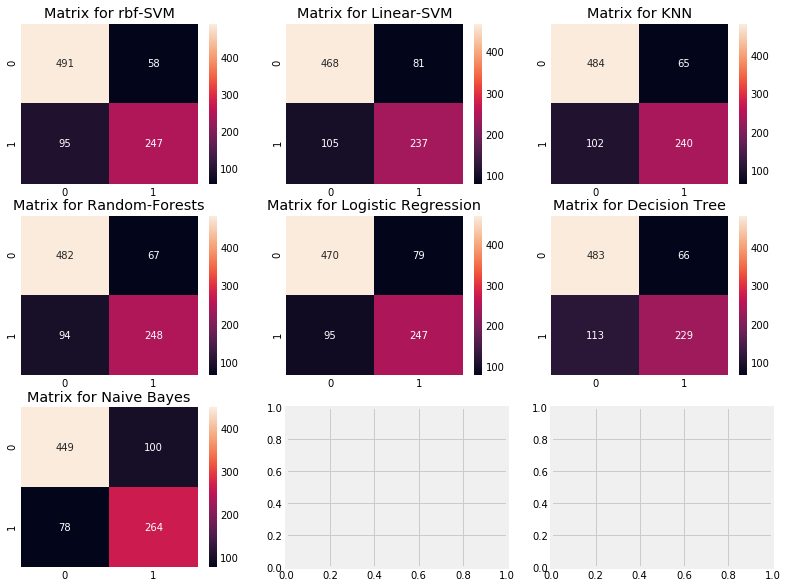

In [62]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

**혼동 행렬 해석**
왼쪽 대각선은 각 클래스에 대한 올바른 예측 수를 나타내고 오른쪽 대각선은 잘못된 예측 수를 나타냅니다. rbf-SVM의 첫 번째 줄거리를 고려해 보겠습니다.

1) 아니오. 정확한 예측값은 **491 (죽음의 경우) + 247 (생존 한 경우)이며 평균 CV 정확도는 (491 + 247) / 891 = 82.8 %입니다.**

2) **오류->** 잘못 분류 된 58 명은 생존 한 것으로, 95 명은 사망 한 것으로 생존했다. 따라서 살아남은 상태에서 죽은 것을 예측함으로써 더 많은 실수를 저질렀습니다.

모든 행렬을 살펴보면 rbf-SVM은 죽은 승객을 정확하게 예측할 가능성이 높지만 NaiveBayes는 생존 한 승객을 정확하게 예측할 가능성이 높다고 말할 수 있습니다.

## SVM

In [63]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8282593685267716
SVC(C=0.4, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   50.3s finished


Random Forests
임의의 숲

In [ ]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


Rbf-Svm의 최고 점수는 **82.82 % (C = 0.05, 감마 = 0.1)**입니다. RandomForest의 경우 n_estimators = 900에서 점수는 **81.8 %입니다.**

## 조립
조립은 모델의 정확도 또는 성능을 높이는 좋은 방법입니다. 간단히 말해서 다양한 단일 모델을 결합하여 하나의 강력한 모델을 만듭니다.

전화를 사고 다양한 매개 변수를 기반으로 많은 사람들에게 전화를 요청한다고 가정 해 봅시다. 따라서 모든 다른 매개 변수를 분석 한 후 단일 제품에 대해 강력한 판단을 내릴 수 있습니다. 모델의 안정성을 향상시키는 Ensembling입니다. 다음과 같은 방법으로 조립할 수 있습니다.

1) 투표 분류기

2) 바지

3) 부스팅.

**투표 분류기**
여러 다른 간단한 기계 학습 모델의 예측을 결합하는 가장 간단한 방법입니다. 모든 하위 모델의 예측을 기반으로 평균 예측 결과를 제공합니다. 하위 모델 또는 기본 모델은 모두 다른 유형입니다.

In [ ]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

**포장**
배깅은 일반적인 앙상블 방법입니다. 데이터 세트의 작은 파티션에 유사한 분류자를 적용한 다음 모든 예측의 평균을 취합니다. 평균화로 인해 분산이 줄어 듭니다. 투표 분류기와 달리 배깅은 유사한 분류자를 사용합니다.

**태그가있는 KNN**
배깅은 분산이 높은 모델에 가장 적합합니다. 이에 대한 예는 의사 결정 트리 또는 임의 포리스트입니다. 작은 값의 n_neighbours로 작은 값의 n_neighbours로 KNN을 사용할 수 있습니다.

In [ ]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

## 재갈 의사 결정 트리(Bagged DecisionTree)

In [ ]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

## 부스팅
부스팅은 분류기의 순차적 학습을 사용하는 조립 기술입니다. 약한 모델을 단계별로 향상시키는 방법으로 부스트는 다음과 같이 작동합니다.

모델은 먼저 전체 데이터 세트에 대해 학습됩니다. 이제 모델이 잘못되었을 때 인스턴스를 얻습니다. 이제 다음 반복에서 학습자는 잘못 예측 된 인스턴스에 더 집중하거나 더 많은 가중치를 부여합니다. 따라서 잘못된 인스턴스를 올바르게 예측하려고 시도합니다. 이제이 반복적 인 프로세스는 계속되고 정확도에 한계에 도달 할 때까지 새로운 분류자가 모델에 추가됩니다.

## 에이다 부스트 (Adaptive Boosting)
이 경우 약한 학습자 또는 추정자는 Decsion Tree입니다. 그러나 dafault base_estimator를 선택한 알고리즘으로 변경할 수 있습니다.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

## 확률 적 그라디언트 부스팅
여기 약한 학습자는 의사 결정 트리입니다.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

## XGBoost

In [ ]:
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

우리는 AdaBoost에 대해 가장 높은 정확도를 얻었습니다. Hyper-Parameter Tuning을 사용하여 증가 시키려고합니다.

## AdaBoost를위한 하이퍼 파라미터 튜닝

In [ ]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

우리는 AdaBoost에 대해 가장 높은 정확도를 얻었습니다. Hyper-Parameter Tuning을 사용하여 증가 시키려고합니다.

## AdaBoost를위한 하이퍼 파라미터 튜닝

In [ ]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

AdaBoost로 얻을 수있는 최대 정확도는 n_estimators = 200 및 learning_rate = 0.05 인 경우 83.16 %입니다.

## 최고의 모델을위한 혼동 매트릭스

In [ ]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

## 기능 중요성

In [ ]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

RandomForests, AdaBoost 등과 같은 다양한 분류기의 중요한 기능을 볼 수 있습니다.

## 결과 :
1) 일반적인 중요한 기능 중 일부는 Initial, Fare_cat, Pclass, Family_Size입니다.

2) 섹스 기능은 중요하지 않은 것으로 보이며, Pclass와 결합 된 섹스가 매우 좋은 차별화 요소를 제공한다는 것을 앞에서 본 것처럼 충격적입니다. 섹스는 RandomForests에서만 중요해 보입니다.

그러나 많은 분류기에서 최상위에있는 Initial 기능을 볼 수 있습니다. 우리는 이미 Sex와 Initial 사이의 긍정적 인 상관 관계를 보았으므로 성별을 나타냅니다.

3) 유사하게 Pclass 및 Fare_cat은 Alone, Parch 및 SibSp를 가진 승객 및 Family_Size의 상태를 나타냅니다.